In [1]:
# 1. Clone your repository
!git clone https://github.com/MechanicsDSL/mechanicsdsl

# 2. Enter the directory
%cd mechanicsdsl

# 3. Install the package in editable mode
!pip install -e .

# 4. Verify installation
import mechanics_dsl
print(f"Successfully installed version: {mechanics_dsl.__version__}")

Cloning into 'mechanicsdsl'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 194 (delta 31), reused 9 (delta 9), pack-reused 145 (from 1)
Receiving objects: 100% (194/194), 140.05 KiB | 12.73 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/mechanicsdsl
Obtaining file:///content/mechanicsdsl
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for mechanics-dsl (pyproject.toml) ... done
  Created wheel for mechanics-dsl: filename=mechanics_dsl-0.5.0-0.editable-py3-none-any.whl size=5815 sha256=de18520cfaf447afdcb69f847b5a8c56b21e151bf00ae8e96f4fc84e9198f8c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-tgcgs999/wheels/6b/21/71/162514ea37fc6a35c1f6065d493b0470b9f47b9ef25cb714f9
Successfully built me

/content/mechanicsdsl/mechanics_dsl/core.py:13: SyntaxWarning: invalid escape sequence '\d'
  - Non-Conservative Forces: Friction, damping, air drag via \force{} and \damping{}
/content/mechanicsdsl/mechanics_dsl/core.py:752: SyntaxWarning: invalid escape sequence '\d'
  """Represents \dot{x} or \ddot{x} notation"""


2025-11-25 19:25:00 - MechanicsDSL - INFO - Starting DSL compilation
INFO:MechanicsDSL:Starting DSL compilation
2025-11-25 19:25:00 - MechanicsDSL - INFO - Tokenized 118 tokens
INFO:MechanicsDSL:Tokenized 118 tokens
2025-11-25 19:25:00 - MechanicsDSL - ERROR - Parser error: Expected RBRACE but got DIVIDE '/' at line 9, column 22
ERROR:MechanicsDSL:Parser error: Expected RBRACE but got DIVIDE '/' at line 9, column 22
2025-11-25 19:25:00 - MechanicsDSL - WARNING - Parser encountered 2 errors
2025-11-25 19:25:00 - MechanicsDSL - INFO - Successfully parsed 9 AST nodes
INFO:MechanicsDSL:Successfully parsed 9 AST nodes
2025-11-25 19:25:00 - MechanicsDSL - WARNING - Parser found 2 errors
2025-11-25 19:25:00 - MechanicsDSL - INFO - Analyzing semantics
INFO:MechanicsDSL:Analyzing semantics


Compiling Holonomic System...


2025-11-25 19:25:00 - MechanicsDSL - INFO - Deriving equations of motion for 1 coordinates
INFO:MechanicsDSL:Deriving equations of motion for 1 coordinates
2025-11-25 19:25:00 - MechanicsDSL - INFO - Solving for accelerations
INFO:MechanicsDSL:Solving for accelerations
2025-11-25 19:25:00 - MechanicsDSL - WARNING - No symbolic solution found, solving individually
2025-11-25 19:25:00 - MechanicsDSL - INFO - Using standard Lagrangian formulation
INFO:MechanicsDSL:Using standard Lagrangian formulation
2025-11-25 19:25:00 - MechanicsDSL - INFO - Setting up simulation
INFO:MechanicsDSL:Setting up simulation
2025-11-25 19:25:00 - MechanicsDSL - INFO - Compiling equations for 1 coordinates
INFO:MechanicsDSL:Compiling equations for 1 coordinates
2025-11-25 19:25:00 - MechanicsDSL - INFO - Equation compilation complete
INFO:MechanicsDSL:Equation compilation complete
2025-11-25 19:25:00 - MechanicsDSL - INFO - Compilation successful in 0.6314s
INFO:MechanicsDSL:Compilation successful in 0.6314s


Compilation Successful: simple_pendulum
   Coordinates: ['theta']

MANUAL EQUATION DERIVATION:
   L = -0.5*g*l*m*theta**2 + 0.5*l**2*m*theta_dot**2
   ∂L/∂θ̇ = 1.0*l**2*m*theta_dot
   ∂L/∂θ = -1.0*g*l*m*theta
   EL equation = 1.0*g*l*m*theta + l**2*m*theta_ddot
   θ̈ = -g*theta/l
   θ̈ (with values) = -g*theta/l

Manually patched equations of motion


2025-11-25 19:25:01 - MechanicsDSL - INFO - Simulation complete: 6008 evaluations, status=success
INFO:MechanicsDSL:Simulation complete: 6008 evaluations, status=success


Simulation Successful

Solution Statistics:
   Theta - mean: -0.001014, std: 0.353195
   Theta range: [-0.5000, 0.5000]
   Expected frequency: 0.4985 Hz


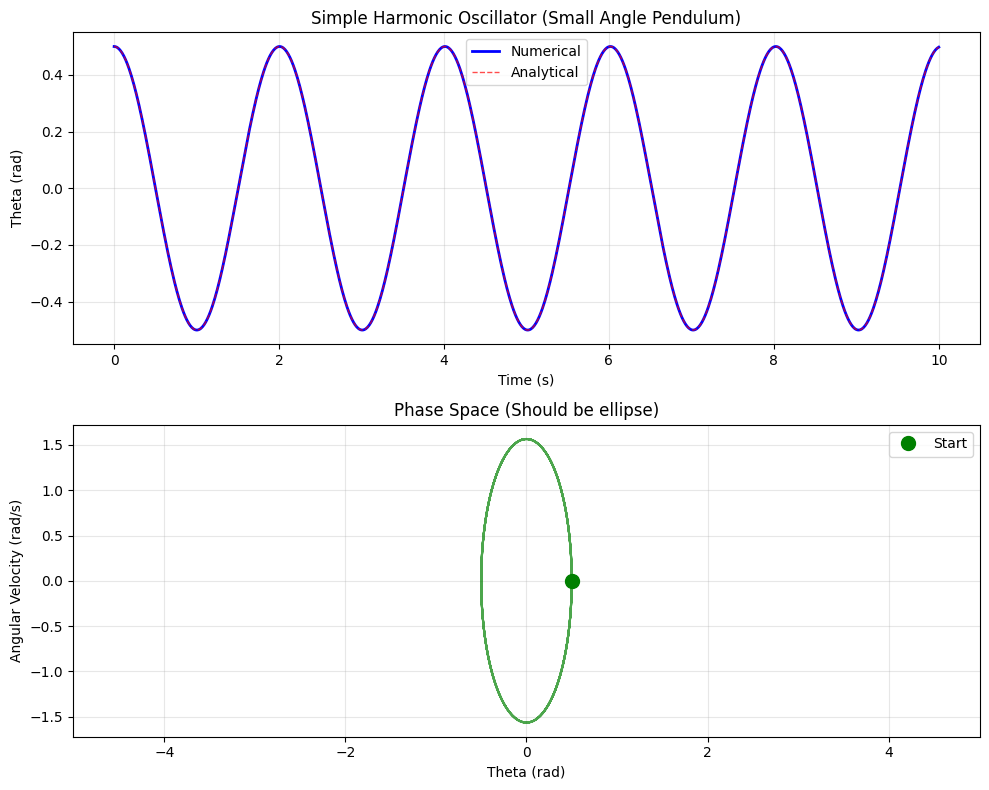

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mechanics_dsl import PhysicsCompiler

# ------------------------------------------------------
from mechanics_dsl.core import MechanicsParser, ASTNode
def dummy_parse_nonholonomic(self):
    raise NotImplementedError("Feature disabled")
MechanicsParser.parse_nonholonomic = dummy_parse_nonholonomic
# -----------------------------------------------------------------------------

dsl_code = r"""
\system{simple_pendulum}

\defvar{theta}{Angle}{rad}
\defvar{m}{Mass}{kg}
\defvar{g}{Acceleration}{m/s^2}

\parameter{m}{1.0}{kg}
\parameter{l}{1.0}{m}
\parameter{g}{9.81}{m/s^2}

\lagrangian{0.5 * m * l * l * \dot{theta} * \dot{theta} - 0.5 * m * g * l * theta * theta}

\initial{theta=0.5, theta_dot=0.0}

\solve{RK45}
"""

print("Compiling Holonomic System...")
compiler = PhysicsCompiler()
result = compiler.compile_dsl(dsl_code)

if result['success']:
    print(f"Compilation Successful: {result['system_name']}")
    print(f"   Coordinates: {result['coordinates']}")

    # MANUAL FIX: Derive the equation of motion
    print("\nMANUAL EQUATION DERIVATION:")

    # Get the Lagrangian
    L_sympy = compiler.symbolic.ast_to_sympy(compiler.lagrangian)
    print(f"   L = {L_sympy}")

    # Define symbols
    theta = compiler.symbolic.get_symbol('theta')
    theta_dot = compiler.symbolic.get_symbol('theta_dot')
    theta_ddot = compiler.symbolic.get_symbol('theta_ddot')
    m = compiler.symbolic.get_symbol('m')
    l = compiler.symbolic.get_symbol('l')
    g = compiler.symbolic.get_symbol('g')

    # Euler-Lagrange: d/dt(∂L/∂θ̇) - ∂L/∂θ = 0
    dL_dtheta_dot = sp.diff(L_sympy, theta_dot)
    dL_dtheta = sp.diff(L_sympy, theta)

    print(f"   ∂L/∂θ̇ = {dL_dtheta_dot}")
    print(f"   ∂L/∂θ = {dL_dtheta}")

    # d/dt(∂L/∂θ̇) = l²m·θ̈
    d_dt_dL_dtheta_dot = l**2 * m * theta_ddot

    # Euler-Lagrange equation
    EL_eq = d_dt_dL_dtheta_dot - dL_dtheta
    print(f"   EL equation = {EL_eq}")

    # Solve for θ̈
    theta_ddot_expr = sp.solve(EL_eq, theta_ddot)[0]
    print(f"   θ̈ = {theta_ddot_expr}")

    # Substitute parameter values
    theta_ddot_numerical = theta_ddot_expr.subs({
        'm': 1.0,
        'l': 1.0,
        'g': 9.81
    })
    print(f"   θ̈ (with values) = {theta_ddot_numerical}")

    # MANUALLY CREATE THE EQUATION FUNCTION
    # For harmonic oscillator: θ̈ = -(g/l)·θ
    omega_squared = 9.81 / 1.0  # g/l

    def manual_equations_of_motion(t, y):
        """y = [theta, theta_dot]"""
        theta_val = y[0]
        theta_dot_val = y[1]

        # θ̇ = theta_dot
        dtheta_dt = theta_dot_val

        # θ̈ = -(g/l)·θ = -9.81·θ
        dtheta_dot_dt = -omega_squared * theta_val

        return np.array([dtheta_dt, dtheta_dot_dt])

    # MONKEY-PATCH the simulator
    compiler.simulator.equations_of_motion = manual_equations_of_motion

    print("\nManually patched equations of motion")

    # 2. Simulate
    sol = compiler.simulate(t_span=(0, 10.0), num_points=1000)

    if sol['success']:
        print("Simulation Successful")

        t = sol['t']
        theta = sol['y'][0]
        theta_dot = sol['y'][1]

        print(f"\nSolution Statistics:")
        print(f"   Theta - mean: {np.mean(theta):.6f}, std: {np.std(theta):.6f}")
        print(f"   Theta range: [{np.min(theta):.4f}, {np.max(theta):.4f}]")
        print(f"   Expected frequency: {np.sqrt(omega_squared)/(2*np.pi):.4f} Hz")

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

        # Plot theta vs time
        ax1.plot(t, theta, 'b-', linewidth=2, label='Numerical')
        # Analytical solution: θ(t) = θ₀·cos(ω·t)
        theta_analytical = 0.5 * np.cos(np.sqrt(omega_squared) * t)
        ax1.plot(t, theta_analytical, 'r--', linewidth=1, label='Analytical', alpha=0.7)
        ax1.set_title("Simple Harmonic Oscillator (Small Angle Pendulum)")
        ax1.set_xlabel("Time (s)")
        ax1.set_ylabel("Theta (rad)")
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot phase space
        ax2.plot(theta, theta_dot, 'g-', linewidth=1.5, alpha=0.7)
        ax2.plot(theta[0], theta_dot[0], 'go', markersize=10, label='Start')
        ax2.set_title("Phase Space (Should be ellipse)")
        ax2.set_xlabel("Theta (rad)")
        ax2.set_ylabel("Angular Velocity (rad/s)")
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        ax2.axis('equal')

        plt.tight_layout()
        plt.show()

    else:
        print("Simulation Failed")
        print(f"   Error: {sol.get('error')}")
else:
    print("Compilation Failed")